In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import h5py
import numpy as np

sys.path.append("..")
from dm21cm.utils import save_h5_dict

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../matplotlibrc')

In [2]:
def photE_DH(n=500):
    dlnphoteng   = np.log(5565952217145.328/1e-4) / n
    photbins     = 1e-4 * np.exp(np.arange(n+1)*dlnphoteng)
    photenglow   = photbins[:n]
    photenghigh  = photbins[1:]
    photeng      = np.sqrt(photenglow * photenghigh)
    return photeng

def elecEk_DH(n=500):
    dlneng       = np.log(5565952217145.328)/n
    melec        = 510998.903
    elecbins     = melec + np.exp(np.arange(n+1) * dlneng)
    elecenglow   = elecbins[:n]
    elecenghigh  = elecbins[1:]
    eleckeng     = np.sqrt((elecenglow - melec) * (elecenghigh - melec))
    return eleckeng

In [3]:
save_dir = '../data/abscissas'

## abscissas

In [ ]:
abscs_name = 'abscs_debug_231002' # debug abscs dense in redshift and x
abscs = {
    'rs' : np.linspace(5, 50, 20),
    'x' : np.array([1e-5, 3.333e-5, 1e-4, 3.333e-4, 1e-3, 3.333e-3, 1e-2, 3.333e-2, 0.1,
                    0.2, 0.3, 0.5, 0.7, 0.8,
                    0.9, 0.99, 0.999, 0.9999, 0.99999]),
    'nBs' : np.array([0., 50.]),
    'photE' : photE_DH(n=500),
    'elecEk' : elecEk_DH(n=500),
    'dep_c' : np.array(['H ion', 'He ion', 'exc', 'heat', 'cont', 'xray'], dtype=h5py.string_dtype(encoding='utf-8')),
    'dlnz' : np.log(1.01),
}
save_h5_dict(f'{save_dir}/{abscs_name}.h5', abscs)

In [4]:
zf_s = [1.05, 1.01, 1.003, 1.001] # z factor e.g. 003: 1+z_next/1+z = 1.003
zfstr_s = ['05', '01', '003', '001']

for zf, zfstr in zip(zf_s, zfstr_s):
    abscs_name = f'abscs_zf{zfstr}'
    abscs = {
        'rs' : np.geomspace(5., 50., 10),
        'x' : np.array([1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.3, 0.7, 0.9, 1-1e-3, 1-1e-5]),
        'nBs' : np.array([0.001, 0.262, 0.708, 0.818, 0.888, 0.944, 1.000, 1.102, 4.855, 10.]),
        'photE' : photE_DH(n=500),
        'elecEk' : elecEk_DH(n=500),
        'dep_c' : np.array(['H ion', 'He ion', 'exc', 'heat', 'cont', 'xray'], dtype=h5py.string_dtype(encoding='utf-8')),
        'dlnz' : np.log(zf),
    }
    save_h5_dict(f'{save_dir}/{abscs_name}.h5', abscs)
    if zf in [1.01, 1.001]:
        save_h5_dict(f'{save_dir}/{abscs_name}-noHe.h5', abscs)
    tf_name = 'zf' + zfstr
    os.makedirs(f"{os.environ['DM21CM_DATA_DIR']}/tf/{tf_name}/phot/ionhist_outputs", exist_ok=True)
    os.makedirs(f"{os.environ['DM21CM_DATA_DIR']}/tf/{tf_name}/elec", exist_ok=True)
    if zf in [1.01, 1.001]:
        os.makedirs(f"{os.environ['DM21CM_DATA_DIR']}/tf/{tf_name}-noHe/phot/ionhist_outputs", exist_ok=True)
        os.makedirs(f"{os.environ['DM21CM_DATA_DIR']}/tf/{tf_name}-noHe/elec", exist_ok=True)

In [ ]:
abscs_name = 'abscs_debug_230803' # a test abscs dense in redshift
abscs = {
    'rs' : np.linspace(5, 50, 100),
    'x' : np.array([0., 1.]),
    'nBs' : np.array([0., 10.]),
    'photE' : photE_DH(n=500),
    'elecEk' : elecEk_DH(n=500),
    'dep_c' : np.array(['H ion', 'He ion', 'exc', 'heat', 'cont', 'xray'], dtype=h5py.string_dtype(encoding='utf-8')),
    'dlnz' : np.log(1.005),
}
save_h5_dict(f'{save_dir}/{abscs_name}.h5', abscs)

In [9]:
abscs_name = 'abscs_230629' # change from last: smaller dlnz
abscs = {
    'rs' : np.logspace(np.log10(5), np.log10(50), 10),
    'x' : np.array([1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.3, 0.7, 0.9, 1-1e-3, 1-1e-5]),
    'nBs' : np.array([0.001, 0.262, 0.708, 0.818, 0.888, 0.944, 1.006, 1.102, 4.855, 10.]),
    'photE' : photE_DH(n=500),
    'elecEk' : elecEk_DH(n=500),
    'dep_c' : np.array(['H ion', 'He ion', 'exc', 'heat', 'cont', 'xray'], dtype=h5py.string_dtype(encoding='utf-8')),
    'dlnz' : np.log(1.01),
}
save_h5_dict(f'{save_dir}/{abscs_name}.h5', abscs)

In [6]:
abscs_name = 'abscs_230408x'
abscs = {
    'rs' : np.logspace(np.log10(5), np.log10(50), 10),
    'x' : np.array([1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.3, 0.7, 0.9, 1-1e-3, 1-1e-5]),
    'nBs' : np.array([0.001, 0.262, 0.708, 0.818, 0.888, 0.944, 1.006, 1.102, 4.855, 10.]),
    'photE' : photE_DH(n=500),
    'elecEk' : elecEk_DH(n=500),
    'dep_c' : np.array(['H ion', 'He ion', 'exc', 'heat', 'cont', 'xray'], dtype=h5py.string_dtype(encoding='utf-8')),
    'dlnz' : 0.04879016,
}
save_h5_dict(f'{save_dir}/{abscs_name}.h5', abscs)

In [4]:
abscs_name = 'abscs_base'
abscs = {
    'photE' : photE_DH(n=500),
    'elecEk' : elecEk_DH(n=500),
    'dep_c' : np.array(['H ion', 'He ion', 'exc', 'heat', 'cont'], dtype=h5py.string_dtype(encoding='utf-8')),
}
save_h5_dict(f'{save_dir}/{abscs_name}.h5', abscs)

## A. IDL string generator

In [ ]:
sys.path.append("..")
from dm21cm.utils import load_h5_dict

In [ ]:
abscs_name = 'abscs_zf003'
abscs = load_h5_dict(f"{save_dir}/{abscs_name}.h5")

print(f'dlnz = {abscs["dlnz"]:.15f}d')
for key, item in abscs.items():
    if key not in ['photE', 'elecEk', 'dep_c', 'dlnz']:
        key_show = key if key != 'rs' else 'z'
        print(key_show+'_s_global = ['+'d, '.join([f'{v:.10f}' for v in item])+'d]')

dlnz = 0.002995508979798d
nBs_s_global = [0.0010000000d, 0.2620000000d, 0.7080000000d, 0.8180000000d, 0.8880000000d, 0.9440000000d, 1.0060000000d, 1.1020000000d, 4.8550000000d, 10.0000000000d]
z_s_global = [5.0000000000d, 6.4577483251d, 8.3405026860d, 10.7721734502d, 13.9127970110d, 17.9690683190d, 23.2079441681d, 29.9742125159d, 38.7131841341d, 50.0000000000d]
x_s_global = [0.0000100000d, 0.0001000000d, 0.0010000000d, 0.0100000000d, 0.1000000000d, 0.3000000000d, 0.7000000000d, 0.9000000000d, 0.9990000000d, 0.9999900000d]


## B. `nBs` and `x` distribution in 21cmfast solutions

In [ ]:
soln_dir = '../data/run_info'

In [ ]:
data = np.load(f'{soln_dir}/base_slices.npy', allow_pickle=True)

In [ ]:
x_e_collection = np.array([d['x_e'] for d in data]).flatten()

In [ ]:
x_e_absc = np.array([1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.3, 0.7, 0.9, 1-1e-3, 1-1e-5])

fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].hist(np.clip(x_e_collection, 1.1e-5, None), bins=np.logspace(-5, 0, 30), rwidth=0.9, color='darkgray')
axs[0].set(xscale='log', yscale='log')
axs[1].hist(np.clip(1-x_e_collection, 1.1e-5, None), bins=np.logspace(-5, 0, 30), rwidth=0.9, color='darkgray')
axs[1].set(xscale='log', yscale='log')
for x_e in x_e_absc:
    axs[0].axvline(x_e, color='firebrick')
    axs[1].axvline(1-x_e, color='firebrick')
axs[0].set(xlabel=r'$x_e$')
axs[1].set(xlabel=r'$1-x_e$')
fig.suptitle(r'$x_e$ abscissa and values from a 21cmFAST run')
plt.savefig('x_e_absc.pdf')

In [32]:
nBs_collection = 1 + np.array([d['delta'] for d in data]).flatten()

In [55]:
nBs_absc = np.round(1000*np.quantile(nBs_collection, np.linspace(0, 1, 8))) / 1000
nBs_absc = np.insert(nBs_absc, 0, 0)
nBs_absc = np.append(nBs_absc, 10)
print(nBs_absc, len(nBs_absc))

[ 0.     0.262  0.708  0.818  0.888  0.944  1.006  1.102  4.855 10.   ] 10


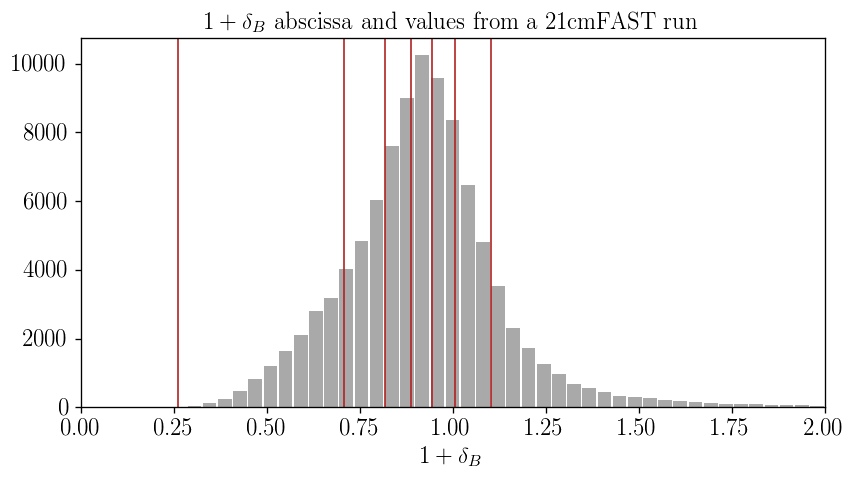

In [56]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(1+delta_collection, bins=np.linspace(0, 2, 50), rwidth=0.9, color='darkgray')
for nBs in nBs_absc:
    ax.axvline(nBs, color='firebrick', lw=1)
ax.set(xlim=(0, 2))
ax.set(xlabel=r'$1+\delta_B$', title=r'$1+\delta_B$ abscissa and values from a 21cmFAST run')
plt.savefig('nBs_absc.pdf')